In [1]:
import os
import sys 
os.environ["SPARK_HOME"]="C:\\Users\\Eunda\\code\\s_201511079\\spark-2.0.0-bin-hadoop2.6"
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).config('spark.sql.warehouse.dir','file:///C:/Users/Eunda/code/s_201511079/data').getOrCreate()


In [8]:
%%writefile data/1.txt
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
Apache Spark Apache Spark Apache Spark Apache Spark
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Originally developed at the University of California, Berkeley's AMPLab,
the Spark codebase was later donated to the Apache Software Foundation,
which has maintained it since.
Spark provides an interface for programming entire clusters with
implicit data parallelism and fault-tolerance.

Overwriting data/1.txt


In [3]:
import os
myDf=spark.read.text("./data/1.txt")
print type(myDf)

<class 'pyspark.sql.dataframe.DataFrame'>


In [10]:
myDf.take(1)

[Row(value=u'Wikipedia')]

In [11]:
import os
myDf=spark.read.text(os.path.join("data","ds_spark_wiki.txt"))
print type(myDf)

<class 'pyspark.sql.dataframe.DataFrame'>


In [12]:

myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))
print myRdd2.first()

Wikipedia


In [13]:
#S.6
def mySplit(x):
    return x.split(" ")

words=myRdd2.map(mySplit)

In [14]:
words.count()

10

In [16]:
words.take(3)

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]

In [17]:
for line in words.collect():
    for word in line:
        print word,
    print "\n-----"

Wikipedia 
-----
Apache Spark is an open source cluster computing framework. 
-----
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. 
-----
Apache Spark Apache Spark Apache Spark Apache Spark 
-----
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 
-----
Originally developed at the University of California, Berkeley's AMPLab, 
-----
the Spark codebase was later donated to the Apache Software Foundation, 
-----
which has maintained it since. 
-----
Spark provides an interface for programming entire clusters with 
-----
implicit data parallelism and fault-tolerance. 
-----


In [18]:
myRdd2.map(lambda s:len(s)).collect()

[9, 59, 32, 51, 31, 72, 71, 30, 64, 46]

In [19]:
myRdd_spark=myRdd2.filter(lambda line:"Spark" in line)

In [20]:
print myRdd_spark.count()

4


In [24]:
stopwords = ['is','am','are','the','for','a']
myRdd_stop = myRdd2.filter(lambda x: x not in stopwords)
myRdd_stop.take(6)

[u'Wikipedia',
 u'Apache Spark is an open source cluster computing framework.',
 u'\uc544\ud30c\uce58 \uc2a4\ud30c\ud06c\ub294 \uc624\ud508 \uc18c\uc2a4 \ud074\ub7ec\uc2a4\ud130 \ucef4\ud4e8\ud305 \ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.',
 u'Apache Spark Apache Spark Apache Spark Apache Spark',
 u'\uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c',
 u"Originally developed at the University of California, Berkeley's AMPLab,"]

In [25]:
a=["this is","a line"]
_rdd=spark.sparkContext.parallelize(a)

words=_rdd.map(lambda x:x.split())
print words.collect()

[['this', 'is'], ['a', 'line']]


In [15]:
%%writefile data/wiki.txt
Apache Spark provides programmers with an application programming interface centered on a data structure called the resilient distributed dataset (RDD), a read-only multiset of data items distributed over a cluster of machines, that is maintained in a fault-tolerant way. It was developed in response to limitations in the MapReduce cluster computing paradigm, which forces a particular linear dataflow structure on distributed programs: MapReduce programs read input data from disk, map a function across the data, reduce the results of the map, and store reduction results on disk. Spark's RDDs function as a working set for distributed programs that offers a (deliberately) restricted form of distributed shared memory.
The availability of RDDs facilitates the implementation of both iterative algorithms, that visit their dataset multiple times in a loop, and interactive/exploratory data analysis, i.e., the repeated database-style querying of data. The latency of such applications (compared to a MapReduce implementation, as was common in Apache Hadoop stacks) may be reduced by several orders of magnitude. Among the class of iterative algorithms are the training algorithms for machine learning systems, which formed the initial impetus for developing Apache Spark.
Apache Spark requires a cluster manager and a distributed storage system. For cluster management, Spark supports standalone (native Spark cluster), Hadoop YARN, or Apache Mesos. For distributed storage, Spark can interface with a wide variety, including Hadoop Distributed File System (HDFS),[7] MapR File System (MapR-FS), Cassandra, OpenStack Swift, Amazon S3, Kudu, or a custom solution can be implemented. Spark also supports a pseudo-distributed local mode, usually used only for development or testing purposes, where distributed storage is not required and the local file system can be used instead; in such a scenario, Spark is run on a single machine with one executor per CPU core.

Overwriting data/wiki.txt


In [16]:
import os
myDf=spark.read.text(os.path.join("data", "wiki.txt"))
print type(myDf)

<class 'pyspark.sql.dataframe.DataFrame'>


In [17]:
myRdd2=spark.sparkContext.textFile(os.path.join("data","wiki.txt"))
print myRdd2.first()

Apache Spark provides programmers with an application programming interface centered on a data structure called the resilient distributed dataset (RDD), a read-only multiset of data items distributed over a cluster of machines, that is maintained in a fault-tolerant way. It was developed in response to limitations in the MapReduce cluster computing paradigm, which forces a particular linear dataflow structure on distributed programs: MapReduce programs read input data from disk, map a function across the data, reduce the results of the map, and store reduction results on disk. Spark's RDDs function as a working set for distributed programs that offers a (deliberately) restricted form of distributed shared memory.


In [18]:
def mySplit(x):
    return x.split(" ")

words = myRdd2.map(mySplit)

In [19]:
words.count()

3

In [20]:
words.take(3)

[[u'Apache',
  u'Spark',
  u'provides',
  u'programmers',
  u'with',
  u'an',
  u'application',
  u'programming',
  u'interface',
  u'centered',
  u'on',
  u'a',
  u'data',
  u'structure',
  u'called',
  u'the',
  u'resilient',
  u'distributed',
  u'dataset',
  u'(RDD),',
  u'a',
  u'read-only',
  u'multiset',
  u'of',
  u'data',
  u'items',
  u'distributed',
  u'over',
  u'a',
  u'cluster',
  u'of',
  u'machines,',
  u'that',
  u'is',
  u'maintained',
  u'in',
  u'a',
  u'fault-tolerant',
  u'way.',
  u'It',
  u'was',
  u'developed',
  u'in',
  u'response',
  u'to',
  u'limitations',
  u'in',
  u'the',
  u'MapReduce',
  u'cluster',
  u'computing',
  u'paradigm,',
  u'which',
  u'forces',
  u'a',
  u'particular',
  u'linear',
  u'dataflow',
  u'structure',
  u'on',
  u'distributed',
  u'programs:',
  u'MapReduce',
  u'programs',
  u'read',
  u'input',
  u'data',
  u'from',
  u'disk,',
  u'map',
  u'a',
  u'function',
  u'across',
  u'the',
  u'data,',
  u'reduce',
  u'the',
  u'results

In [25]:
wc2         = myRdd.flatMap(lambda x:x.split()).map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y).map(lambda x:(x[1],x[0])).sortByKey(False).take(30) 

In [26]:
for e in wc2:
    print e

(17, u'a')
(11, u'the')
(10, u'of')
(8, u'distributed')
(7, u'Spark')
(6, u'in')
(5, u'Apache')
(4, u'for')
(4, u'and')
(4, u'data')
(4, u'on')
(4, u'cluster')
(3, u'with')
(3, u'is')
(3, u'Hadoop')
(3, u'be')
(3, u'MapReduce')
(3, u'or')
(3, u'can')
(3, u'that')
(2, u'local')
(2, u'which')
(2, u'supports')
(2, u'For')
(2, u'interface')
(2, u'was')
(2, u'function')
(2, u'as')
(2, u'iterative')
(2, u'storage')


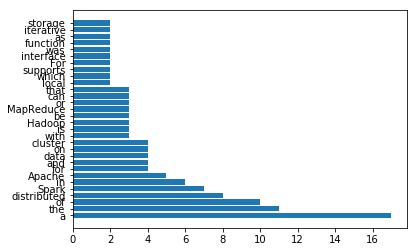

In [29]:
import pyspark
import matplotlib.pyplot as plt


myConf      = pyspark.SparkConf() 
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).config('spark.sql.warehouse.dir','file:///C:/Users/Eunda/code/s_201511079/data').getOrCreate()
filepath    = os.path.join('data','wiki.txt') 
myRdd         = spark.sparkContext.textFile(filepath) 
wc2         = myRdd.flatMap(lambda x:x.split()).map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y).map(lambda x:(x[1],x[0])).sortByKey(False).take(30) 
count       = map(lambda x: x[0],wc2) 
word        = map(lambda x: x[1],wc2) 
plt.barh(range(len(count)),count,color='blue') 
plt.yticks(range(len(count)), word) 
plt.show() 